In [11]:
#!pip install numpy pandas
!pip install matplotlib

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [13]:
# Read data
import os
data_folder = r"C:\Users\arvin.karpiah\Desktop\Data\Snowflake-2-2022\from Vista Flow"
files = os.listdir(data_folder)

print("Files in the folder:")
for file in files:
    print(file)    

Files in the folder:
DAS_1111_strain rate.csv
Snowflake2GeodeLine1_AHV4LinearSweepPlusGeom.csv
Snowflake2GeodeLine1_AHV4LinearSweepPlusGeom.txt
Snowflake2_Lines1-12_AHV4_V_DeviatedSurvey_velocity_converted.csv
Snowflake2_Lines1-12_AHV4_V_DeviatedSurvey_velocity_converted.txt
Snowflake2_Lines1-12_AHV4_V_DeviatedSurvey_velocity_converted_test.csv


In [14]:
geophone_Line1_vel = pd.read_csv(r"C:\Users\arvin.karpiah\Desktop\Data\Snowflake-2-2022\from Vista Flow\Snowflake2GeodeLine1_AHV4LinearSweepPlusGeom.csv")
accelerometer_shotpoint_1111 = pd.read_csv(r"C:\Users\arvin.karpiah\Desktop\Data\Snowflake-2-2022\from Vista Flow\Snowflake2_Lines1-12_AHV4_V_DeviatedSurvey_velocity_converted.csv")
#DAS_shotpoint_1111 = pd.read_csv(r"C:\Users\arvin.karpiah\Desktop\Data\Snowflake-2-2022\from Vista Flow\DAS_1111_strain rate.csv")
#print(geophone_Line1_vel.shape)
#print(accelerometer_shotpoint_1111.shape)
print(DAS_shotpoint_1111)

         Trace-Cnt  CMP_NO  SHOT_POINT_NO  Time  Sample     Amplitude
0                1       0           1111     0       1 -2.761603e+09
1                1       0           1111     2       2  1.927132e+09
2                1       0           1111     4       3  1.202534e+10
3                1       0           1111     6       4  2.411867e+10
4                1       0           1111     8       5  2.995278e+10
...            ...     ...            ...   ...     ...           ...
1048570       1049       0           1111  1140     571  1.150268e+07
1048571       1049       0           1111  1142     572  1.405128e+06
1048572       1049       0           1111  1144     573  2.272966e+06
1048573       1049       0           1111  1146     574  1.549793e+07
1048574       1049       0           1111  1148     575  1.847125e+07

[1048575 rows x 6 columns]


In [15]:
# Extract data by shots
geo_shotpoint_1111 = geophone_Line1_vel[geophone_Line1_vel['SHOT_POINT_NO'] == 1111]

In [16]:
# Remove duplicates
geo_shotpoint_1111 = geo_shotpoint_1111.drop_duplicates(subset=['Time', 'ELEV_REC'])
accelerometer_shotpoint_1111 = accelerometer_shotpoint_1111.drop_duplicates(subset=['Time', 'ELEV_REC'])
print(geo_shotpoint_1111.shape)
print(accelerometer_shotpoint_1111.shape)


(11000, 8)
(693000, 7)


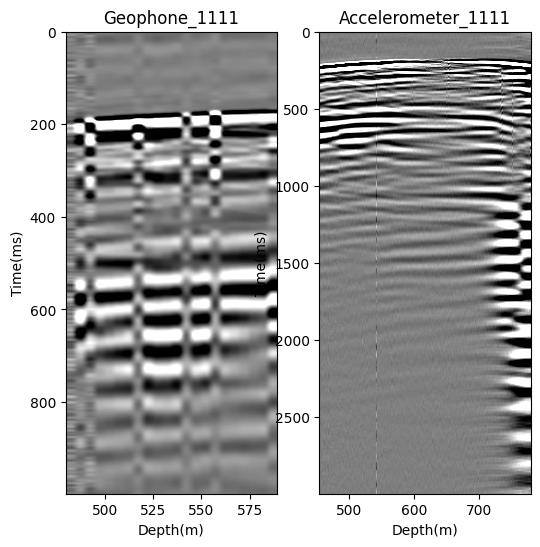

In [17]:
# Create a 2D grid for plotting and plot

pivoted_data = geo_shotpoint_1111.pivot(index='Time', columns='ELEV_REC', values='Amplitude')
pivoted_data_acc = accelerometer_shotpoint_1111.pivot(index='Time', columns='ELEV_REC', values='Amplitude')

plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
plt.imshow(pivoted_data, aspect='auto', cmap='gray', extent=[
           geo_shotpoint_1111['ELEV_REC'].min(), geo_shotpoint_1111['ELEV_REC'].max(), geo_shotpoint_1111['Time'].max(), geo_shotpoint_1111['Time'].min()],vmin=np.percentile(pivoted_data, 5), 
            vmax=np.percentile(pivoted_data, 95))
#plt.colorbar(label='Amplitude')
plt.xlabel('Depth(m)')
plt.ylabel('Time(ms)')
plt.title('Geophone_1111')

plt.subplot(1,2,2)
plt.imshow(pivoted_data_acc, aspect='auto', cmap='gray', extent=[
           accelerometer_shotpoint_1111['ELEV_REC'].min(), accelerometer_shotpoint_1111['ELEV_REC'].max(), accelerometer_shotpoint_1111['Time'].max(), accelerometer_shotpoint_1111['Time'].min()]
           ,vmin=np.percentile(pivoted_data_acc, 5), 
            vmax=np.percentile(pivoted_data_acc, 95))
#plt.colorbar(label='Amplitude')
plt.xlabel('Depth(m)')
plt.ylabel('Time(ms)')
plt.title('Accelerometer_1111')

plt.show()



In [18]:

print('Max and min geophone data are' ,np.max(pivoted_data), np.min(pivoted_data))
print('Max and min accelerometer data are' ,np.max(pivoted_data_acc), np.min(pivoted_data_acc))


Max and min geophone data are 215738864.0 -238408144.0
Max and min accelerometer data are 0.0010395 -0.001174232


In [20]:
np.savetxt('data.txt', pivoted_data)